In [22]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [23]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0


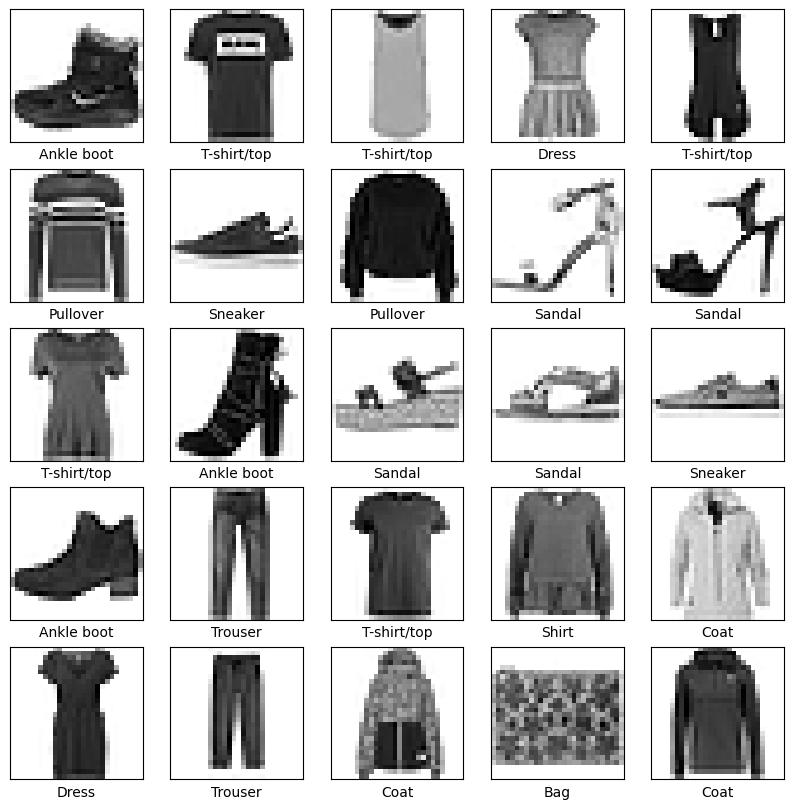

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [38]:
train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

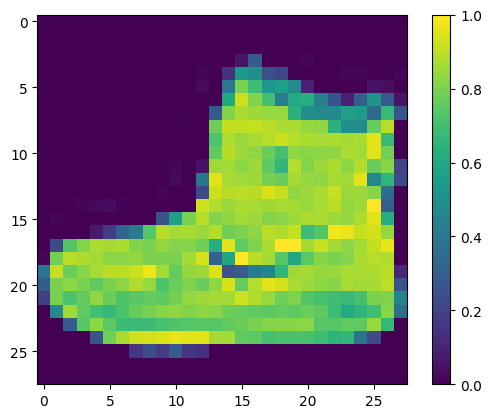

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

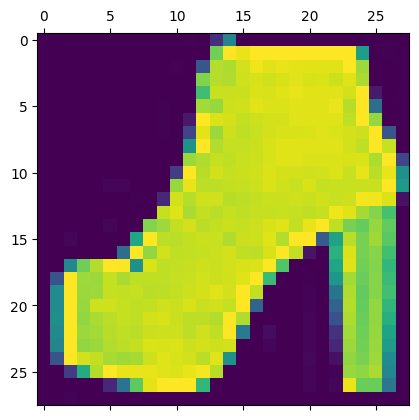

In [39]:
plt.matshow(train_images[44])

In [29]:
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
model=keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.MaxPooling2D((2,2)))

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_9 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 11, 11, 64)       

In [40]:
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [41]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

myCNN = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 112s 58ms/step - loss: 1.6659 - accuracy: 0.2920 - val_loss: 1.4559 - val_accuracy: 0.3133
Epoch 2/10
1875/1875 [==============================] - 109s 58ms/step - loss: 1.3672 - accuracy: 0.3952 - val_loss: 1.7997 - val_accuracy: 0.2837
Epoch 3/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.9581 - accuracy: 0.6296 - val_loss: 1.3550 - val_accuracy: 0.4635
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.7997 - accuracy: 0.7119 - val_loss: 1.3438 - val_accuracy: 0.5656
Epoch 5/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.7582 - accuracy: 0.7305 - val_loss: 1.9163 - val_accuracy: 0.4085
Epoch 6/10
1875/1875 [==============================] - 108s 58ms/step - loss: 0.6491 - accuracy: 0.7647 - val_loss: 0.9925 - val_accuracy: 0.6556
Epoch 7/10
1875/1875 [==============================] - 108s 57ms/step - loss: 0.5459 - accuracy: 0.8044 - val_loss: 1

In [42]:
type(myCNN)

keras.src.callbacks.History

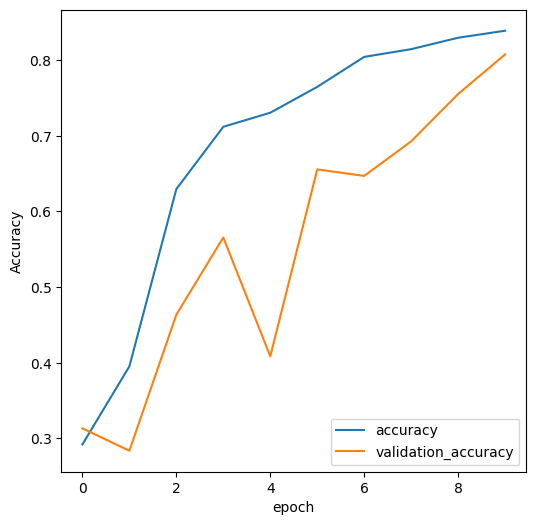

In [43]:
plt.figure(figsize=(6,6))
plt.plot(myCNN.history['accuracy'], label='accuracy')
plt.plot(myCNN.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

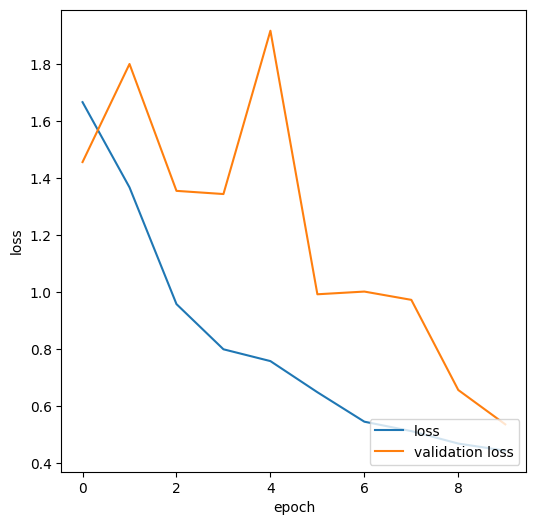

In [44]:
plt.figure(figsize=(6,6))
plt.plot(myCNN.history['loss'],label='loss')
plt.plot(myCNN.history['val_loss'],label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

In [46]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.5366 - accuracy: 0.8076 - 3s/epoch - 11ms/step

Test accuracy: 0.8076000213623047


In [47]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [48]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 5s 15ms/step


In [49]:
predictions[0]

array([0.08818647, 0.08818508, 0.08818512, 0.08819001, 0.0881881 ,
       0.08841939, 0.08818603, 0.12327147, 0.08818895, 0.17099933],
      dtype=float32)

In [50]:
np.argmax(predictions[0])

9

In [51]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

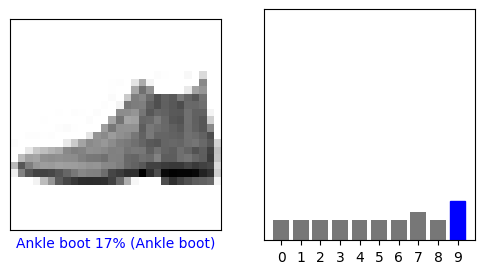

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

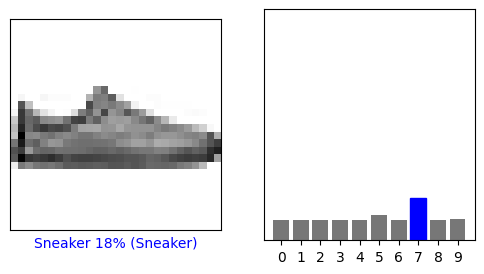

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

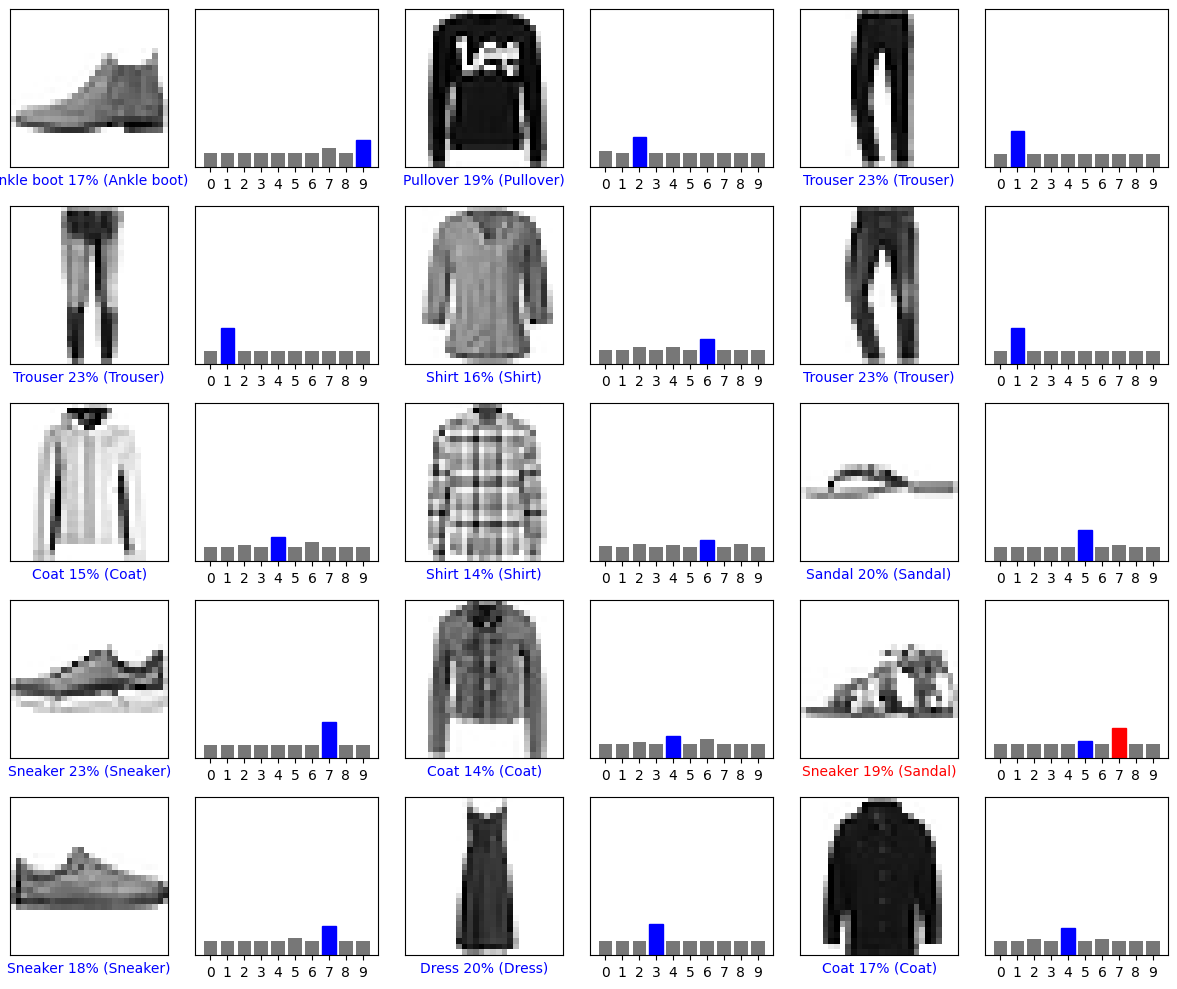

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [64]:
# Grab an image from the test dataset.
img = test_images[55]

print(img.shape)

(28, 28)


In [65]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


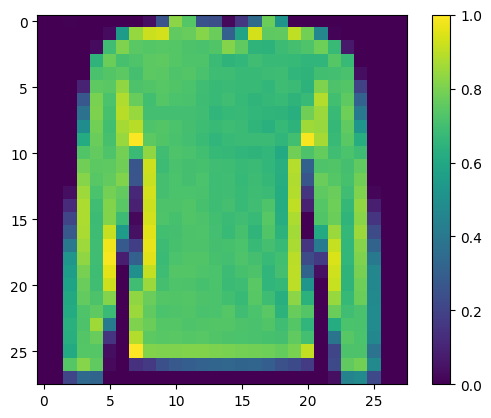

In [66]:
plt.figure()
plt.imshow(test_images[55])
plt.colorbar()
plt.grid(False)
plt.show()

In [67]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 29ms/step
[[0.09220859 0.08763003 0.19195333 0.08794004 0.08831131 0.08757666
  0.10064229 0.08757567 0.0885864  0.08757561]]


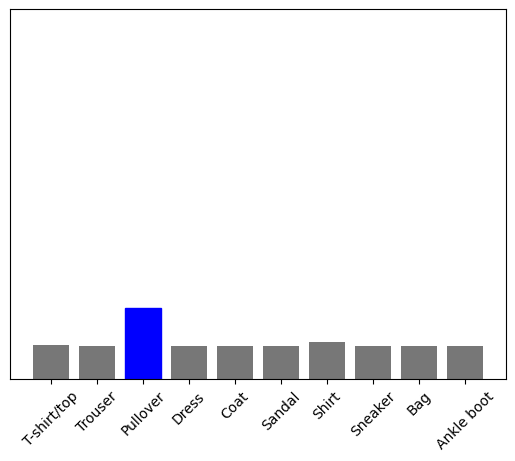

In [68]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [59]:
np.argmax(predictions_single[0])

2